In [1]:
# import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data
url = 'https://drive.google.com/file/d/1PcCyXXs28wvhAcatjBqa48hf9JD8_Xqa/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


### High Level View   

In [3]:
# view head
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
# get shape
df.shape

(157, 13)

This dataset contains information on the happiness and other factors that affect the happiness of each country. From the shape of the dataset, we see a total of 157 rows and 13 columns, meaning we are examing 157 different countries, each ranked 1-157. The data contains mostly numerical data with only two columns containing string data. This data gives us vital information for each of the fields that scientists can use to compare the different countries or to explore the relationship and effect between the fields.

### Preliminary Exploration

First we are going to comb through the dataset to find null values, or missing data, that may affect our data and distributions along with any future calculations. 

In [5]:
# check for null values in each column
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

The results show that there are no null or missing values that we need to worry about removing or addressing. The next step is to look at the descriptive statistics of our data for each column with integer values to see basic information about the distribution, central tendency, and variability for that field. 

In [6]:
# describe column
# exclude happiness rank as it is a label
df.iloc[:,3:].describe()

,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [7]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

After inspecting the descriptive statistics and the data types, we saw that there was no issue with the values and no blatant issues. Next, we also want to visualize the data distribution in its raw form. We use histograms to view the data density and observe potential outliers. 

[Text(0.5, 1.0, 'Dystopia Residual')]

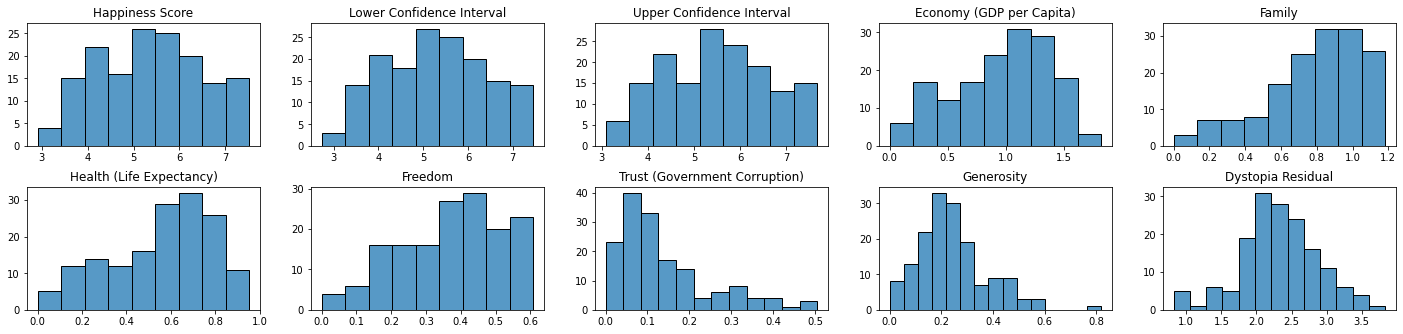

In [8]:
#Run this cell
fig, axes = plt.subplots(2, 5, figsize=(20, 5))

sns.histplot(data=df['Happiness Score'], ax=axes[0,0])
axes[0,0].set(xlabel='', ylabel= '')
axes[0,0].set(title = "Happiness Score")
sns.histplot(data=df['Lower Confidence Interval'], ax=axes[0,1])
axes[0,1].set(xlabel='', ylabel= '')
axes[0,1].set(title = "Lower Confidence Interval")
sns.histplot(data=df['Upper Confidence Interval'], ax=axes[0,2])
axes[0,2].set(xlabel='', ylabel= '')
axes[0,2].set(title = "Upper Confidence Interval")
sns.histplot(data=df['Economy (GDP per Capita)'], ax=axes[0,3])
axes[0,3].set(xlabel='', ylabel= '')
axes[0,3].set(title = "Economy (GDP per Capita)")
sns.histplot(data=df['Family'], ax=axes[0, 4])
axes[0, 4].set(xlabel='', ylabel= '')
axes[0, 4].set(title = "Family")

fig.tight_layout(pad=2.0)

sns.histplot(data=df['Health (Life Expectancy)'], ax=axes[1, 0])
axes[1, 0].set(xlabel='', ylabel= '')
axes[1, 0].set(title = "Health (Life Expectancy)")
sns.histplot(data=df['Freedom'], ax=axes[1,1])
axes[1, 1].set(xlabel='', ylabel= '')
axes[1, 1].set(title = "Freedom")
sns.histplot(data=df['Trust (Government Corruption)'], ax=axes[1,2])
axes[1, 2].set(xlabel='', ylabel= '')
axes[1, 2].set(title = "Trust (Government Corruption)")
sns.histplot(data=df['Generosity'], ax=axes[1,3])
axes[1, 3].set(xlabel='', ylabel= '')
axes[1, 3].set(title = "Generosity")
sns.histplot(data=df['Dystopia Residual'], ax=axes[1,4])
axes[1, 4].set(xlabel='', ylabel= '')
axes[1, 4].set(title = "Dystopia Residual")

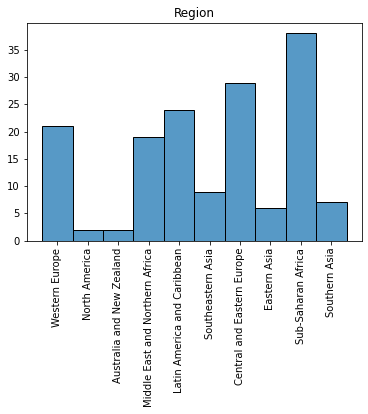

In [9]:
ax = sns.histplot(data=df['Region'])
ax.set(xlabel='', ylabel= '')
ax.set(title = "Region")
ax.tick_params(axis='x', rotation=90)

From these histograms, we are able to see the various distributions, with only the Generosity distribution containing an outlier. However, we do not want to remove the whole row because each row is a unique country and doing so would cause us to lose vital information on that country. As such, for calculations involving generosity, we need to be aware that the data is slightly skewed.

### Defining objectives

How does the distribution of happiness rank vary by region?

What is the relationship between Happiness Score, Economy (GDP per Capita), Health (Life Expectancy), and Freedom?

On average, how does Happiness Score, Economy (GDP per Capita), Health (Life Expectancy), and Freedom vary by region?

### Present Your Findings

#### Findings 1

First, we will be inspecting the distribution of happiness rank by region. To examine the distribution of happiness rank, we make a boxplot where we can easily examine the distribution of numeric data amongst the regions. This plot tells us key information on the range of the scores the region contains along with the median. 

Text(0.5, 1.0, 'Distribution of Happiness Rank by Region')

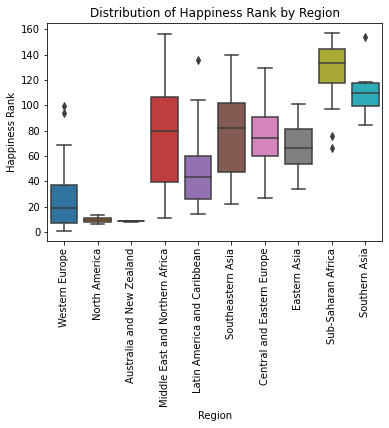

In [10]:
# create boxplot
ax = sns.boxplot(data=df, x = 'Region', y = 'Happiness Rank')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Distribution of Happiness Rank by Region')

We also want to examine the amount of countries within each region to make better sense of the distribution and see the reason some of these distributions are small such as north america and australia and new zealand. 

In [11]:
# print number of countries in each region
print('Western Europe: ' + str(len(df[df['Region'] == 'Western Europe'])) + ' countries')
print('North America: ' + str(len(df[df['Region'] == 'North America'])) + ' countries')
print('Australia and New Zealand: ' + str(len(df[df['Region'] == 'Australia and New Zealand'])) + ' countries')
print('Middle East and Northern Africa: ' + str(len(df[df['Region'] == 'Middle East and Northern Africa'])) + ' countries')
print('Latin America and Caribbean: ' + str(len(df[df['Region'] == 'Latin America and Caribbean'])) + ' countries')
print('Southeastern Asia: ' + str(len(df[df['Region'] == 'Southeastern Asia'])) + ' countries')
print('Central and Eastern Europe: ' + str(len(df[df['Region'] == 'Central and Eastern Europe'])) + ' countries')
print('Eastern Asia: ' + str(len(df[df['Region'] == 'Eastern Asia'])) + ' countries')
print('Sub-Saharan Africa: ' + str(len(df[df['Region'] == 'Sub-Saharan Africa'])) + ' countries')
print('Southern Asia: ' + str(len(df[df['Region'] == 'Southern Asia'])) + ' countries')

Western Europe: 21 countries
North America: 2 countries
Australia and New Zealand: 2 countries
Middle East and Northern Africa: 19 countries
Latin America and Caribbean: 24 countries
Southeastern Asia: 9 countries
Central and Eastern Europe: 29 countries
Eastern Asia: 6 countries
Sub-Saharan Africa: 38 countries
Southern Asia: 7 countries


From the boxplot and the number of countries in each region, we see that the Western Europe Region has the highest distribution of Happiness Rank while the Sub-Saharan Africa Region has the lowest distribution of Happiness Rank. Both the distrbution of North America and Australia and New Zealand are very small due to the little amount of countries within them, however, they are still second and third place in having countries with the highest Happiness Rank. It is interesting to note that the Middle East and Northern Africa Region has the most variability in the distribution of Happiness Ranks and the Southern Asia Region has the least variability in the distribution of Happiness Ranks. It is important to note that due to the small number of countries within some of the regions, these observations are not generalizable to the whole region. With more data and countries within the regions, we will be able to have more accurate and representative data for the region that we can draw conclusions from.

#### Findings 2

Next, we will explore the relationship between Happiness Score, Economy (GDP per Capita), Health (Life Expectancy), and Freedom. To do so, we need to find the correlation between them and use a correlation heatmap for a easy-to-read visualization that will depict the correlations between the variables and the strength of their relation.

In [12]:
# store columns in new dataframe
rel = df[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)','Freedom']]

In [1]:
# create heatmap
plt.figure(figsize=(8,6))
ax = sns.heatmap(rel.corr(),annot=True,linewidths=0.5)
ax.set_title('Heatmap between happiness, economy, health, and freedom')

NameError: name 'plt' is not defined

From this plot, we are able to see that the higher the value is, the stronger the correlation between the topics. For our plot, we see that there are no negaive correlations, i.e., negative values, and only strong and weak positive correlations. It is evident that the economy has the highest correlation with health with a correlation of 0.84, meaning these variables are proportional and directly related. Similarly, the economy has the highest correlation with the happiness score with a correlation of 0.79. Overall, it is evident that all of these variables are positively correlated with freedom having the weakest positive correlation to the other variables.

#### Findings 3

Lastly, we want to examine how the average values for happiness score, economy, health, and freedom vary by region. To do so, we need to make a new dataframe where we group the data by region, aggregate the mean for each of the four columns, and sort by happiness score.  

In [14]:
# create new dataframe from aggregated data
df1 = df.groupby('Region').agg('mean').drop(columns=['Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval',
                                               'Family', 'Trust (Government Corruption)','Generosity','Dystopia Residual']).sort_values(by='Happiness Score', ascending=False).reset_index()
df1

,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom
0,Australia and New Zealand,7.323500,1.402545,0.841080,0.574920
1,North America,7.254000,1.474055,0.803300,0.527665
2,Western Europe,6.685667,1.417056,0.825754,0.477587
3,Latin America and Caribbean,6.101750,0.993410,0.612703,0.426646
4,Eastern Asia,5.624167,1.277312,0.806680,0.387282
5,Middle East and Northern Africa,5.386053,1.139323,0.616438,0.309769
6,Central and Eastern Europe,5.370690,1.047537,0.631592,0.300528
7,Southeastern Asia,5.338889,0.896381,0.561369,0.490123
8,Southern Asia,4.563286,0.660671,0.453670,0.350026
9,Sub-Saharan Africa,4.136421,0.474321,0.239872,0.315424


After creating and viewing our dataframe, we see a general trend from the values that as happiness score decreases, so does economy, health and freedom. Of course there are a few exceptions, such as when North America has a higher economy than Australia and New Zealand even though it has a lower happiness score, but the overall trend is still evident. Seeing the data in its raw form does give us valuable information however, we want to get a better look at the values visually and so we will create bar charts for each of the columns as they have specific values and not ranges. We cannot put all of the columns into one bar chart as the values would look very exaggerated given that happiness goes up to 7.3 and health is as low as 0.24. 

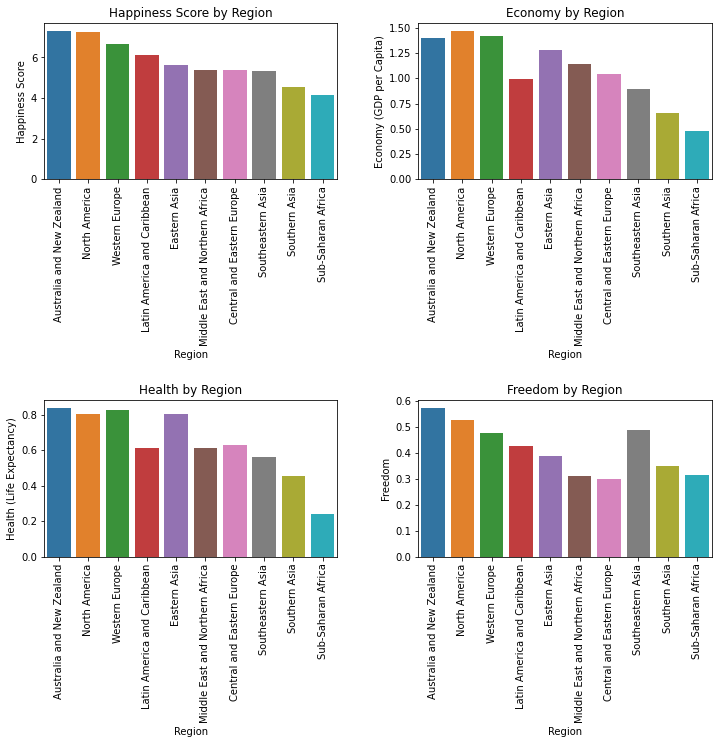

In [15]:
# create barplots
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout(h_pad=20, w_pad= 5)

sns.barplot(data=df1, x='Region', y='Happiness Score', ax=axes[0,0])
axes[0,0].set(title = "Happiness Score by Region")
axes[0,0].tick_params(axis='x', rotation=90)

sns.barplot(data=df1, x='Region', y='Economy (GDP per Capita)', ax=axes[0,1])
axes[0,1].set(title = "Economy by Region")
axes[0,1].tick_params(axis='x', rotation=90)

sns.barplot(data=df1, x='Region', y='Health (Life Expectancy)', ax=axes[1,0])
axes[1,0].set(title = "Health by Region")
axes[1,0].tick_params(axis='x', rotation=90)

sns.barplot(data=df1, x='Region', y='Freedom', ax=axes[1,1])
axes[1,1].set(title = "Freedom by Region")
axes[1,1].tick_params(axis='x', rotation=90)

We also want to examine the amount of countries within each region to make better sense of the averages. 

In [16]:
# print number of countries in each region
print('Western Europe: ' + str(len(df[df['Region'] == 'Western Europe'])) + ' countries')
print('North America: ' + str(len(df[df['Region'] == 'North America'])) + ' countries')
print('Australia and New Zealand: ' + str(len(df[df['Region'] == 'Australia and New Zealand'])) + ' countries')
print('Middle East and Northern Africa: ' + str(len(df[df['Region'] == 'Middle East and Northern Africa'])) + ' countries')
print('Latin America and Caribbean: ' + str(len(df[df['Region'] == 'Latin America and Caribbean'])) + ' countries')
print('Southeastern Asia: ' + str(len(df[df['Region'] == 'Southeastern Asia'])) + ' countries')
print('Central and Eastern Europe: ' + str(len(df[df['Region'] == 'Central and Eastern Europe'])) + ' countries')
print('Eastern Asia: ' + str(len(df[df['Region'] == 'Eastern Asia'])) + ' countries')
print('Sub-Saharan Africa: ' + str(len(df[df['Region'] == 'Sub-Saharan Africa'])) + ' countries')
print('Southern Asia: ' + str(len(df[df['Region'] == 'Southern Asia'])) + ' countries')

Western Europe: 21 countries
North America: 2 countries
Australia and New Zealand: 2 countries
Middle East and Northern Africa: 19 countries
Latin America and Caribbean: 24 countries
Southeastern Asia: 9 countries
Central and Eastern Europe: 29 countries
Eastern Asia: 6 countries
Sub-Saharan Africa: 38 countries
Southern Asia: 7 countries


From the bar charts, we see that the same trend is still present and we have a better idea of the averages between happiness score, economy, health, and freedom by region. On average, regions with a higher happiness score also tend to have higher economy, health, and freedom. With these visuals, we see key exceptions to the trend such as the economy in Latin America and Caribbean, the health in Eastern Asia, and the freedom in Southeasetern Asia. It is important to note that North America and Australia and New Zealand have very few countries and have high scores, leading their average to be extremely high compared to other countries. As stated in the first finding, this is an important observation as it may not be generalizable to the whole region until we have more data for these regions. Seeing these exceptions provokes questions as to why the data shows this and what other factors we are missing that are causing this. For future analyses, it would be interesting to see whether we can explore these variables to figure out the cause.

### Ethics

The ethical concerns that I see with this data is the data source and method of collection. I am firstly looking at the freedom column. Freedom in itself is a really difficult topic to grasp and discuss, not to mention being able to quantify it. It is not something tangible that you can easily count or sum and so it raises questions how the creators of this dataset were able to measure and assign these values. Moreover, it's difficult to have a single standard for freedom across all the difficult countries, further questioning the validity of these values. 

Similarly, how are we able to quanitfy how happy a country is? How are we measuring this value and are we accurately getting a proper representation? Both freedom and happiness are topics that are very subjective and so it's questionable as to whether these values are truly reflective of the country. 

Another ethical concern I see with this data is that it doesn't take other factors into account that affect Health (Life Expectancy). It doesn't consider the fact that some countries have a higher life expectancy because they are a wealthier country that has better healthcare. As a result, the countries are difficult to compare because they start off at different starting points. Therefore, it is misleading to show that a country has a lower life expectancy without referencing the wealth gap or difference in healthcare that may be a cause of it. 